In [269]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno

In [270]:
df=pd.read_csv(r"D:\Swiggy_Time_prediction\Data\swiggy_demographic.csv")
df.head()

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance
0,INDORES13DEL02,37.0,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,sunny,high,...,24,INDO,19,3,saturday,1,15.0,11.0,morning,3.025149
1,BANGRES18DEL02,34.0,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,stormy,jam,...,33,BANG,25,3,friday,0,5.0,19.0,evening,20.183530
2,BANGRES19DEL01,23.0,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,sandstorms,low,...,26,BANG,19,3,saturday,1,15.0,8.0,morning,1.552758
3,COIMBRES13DEL02,38.0,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,sunny,medium,...,21,COIMB,5,4,tuesday,0,10.0,18.0,evening,7.790401
4,CHENRES12DEL01,32.0,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,cloudy,high,...,30,CHEN,26,3,saturday,1,15.0,13.0,afternoon,6.210138


# Data Understanding

In [271]:
df.describe()

,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,vehicle_condition,multiple_deliveries,time_taken,order_day,order_month,is_weekend,pickup_time_minutes,order_time_hour,distance
count,43648.000000,43594.000000,41872.000000,41872.000000,41872.000000,41872.000000,45502.000000,44509.000000,45502.000000,45502.000000,45502.000000,45502.000000,43862.000000,43862.000000,41872.000000
mean,29.555008,4.635287,18.913696,76.921664,18.977356,76.985325,1.019406,0.744928,26.297591,13.811657,2.980726,0.274867,9.989399,17.423966,9.719296
std,5.761482,0.313827,5.467265,3.503107,5.469056,3.503260,0.835229,0.572488,9.386419,8.709540,0.546031,0.446452,4.087516,4.817856,5.602890
min,20.000000,2.500000,9.957144,72.768726,9.967144,72.778726,0.000000,0.000000,10.000000,1.000000,2.000000,0.000000,5.000000,0.000000,1.465067
25%,25.000000,4.500000,12.986047,73.897902,13.065996,73.940327,0.000000,0.000000,19.000000,6.000000,3.000000,0.000000,5.000000,15.000000,4.657655
50%,30.000000,4.700000,19.065838,76.618203,19.124049,76.662620,1.000000,1.000000,26.000000,13.000000,3.000000,0.000000,10.000000,19.000000,9.193014
75%,35.000000,4.900000,22.751234,78.368855,22.820040,78.405467,2.000000,1.000000,32.000000,20.000000,3.000000,1.000000,15.000000,21.000000,13.680920
max,39.000000,5.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000,31.000000,4.000000,1.000000,15.000000,23.000000,20.969489


In [272]:
print("shape of the dataframe:",df.shape)

shape of the dataframe: (45502, 26)


In [273]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 45502 entries, 0 to 45501
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   rider_id              45502 non-null  str    
 1   age                   43648 non-null  float64
 2   ratings               43594 non-null  float64
 3   restaurant_latitude   41872 non-null  float64
 4   restaurant_longitude  41872 non-null  float64
 5   delivery_latitude     41872 non-null  float64
 6   delivery_longitude    41872 non-null  float64
 7   order_date            45502 non-null  str    
 8   weather               44977 non-null  str    
 9   traffic               44992 non-null  str    
 10  vehicle_condition     45502 non-null  int64  
 11  type_of_order         45502 non-null  str    
 12  type_of_vehicle       45502 non-null  str    
 13  multiple_deliveries   44509 non-null  float64
 14  festival              45274 non-null  str    
 15  city_type             44304 no

In [274]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
45497    False
45498    False
45499    False
45500    False
45501    False
Length: 45502, dtype: bool

In [275]:
df[df.duplicated()]

,rider_id,age,ratings,restaurant_latitude,restaurant_longitude,delivery_latitude,delivery_longitude,order_date,weather,traffic,...,time_taken,city_name,order_day,order_month,order_day_of_week,is_weekend,pickup_time_minutes,order_time_hour,order_time_of_day,distance


In [276]:
df.isnull().sum()/len(df)*100

rider_id                0.000000
age                     4.074546
ratings                 4.193222
restaurant_latitude     7.977671
restaurant_longitude    7.977671
delivery_latitude       7.977671
delivery_longitude      7.977671
order_date              0.000000
weather                 1.153795
traffic                 1.120830
vehicle_condition       0.000000
type_of_order           0.000000
type_of_vehicle         0.000000
multiple_deliveries     2.182322
festival                0.501077
city_type               2.632851
time_taken              0.000000
city_name               0.000000
order_day               0.000000
order_month             0.000000
order_day_of_week       0.000000
is_weekend              0.000000
pickup_time_minutes     3.604237
order_time_hour         3.604237
order_time_of_day       0.000000
distance                7.977671
dtype: float64

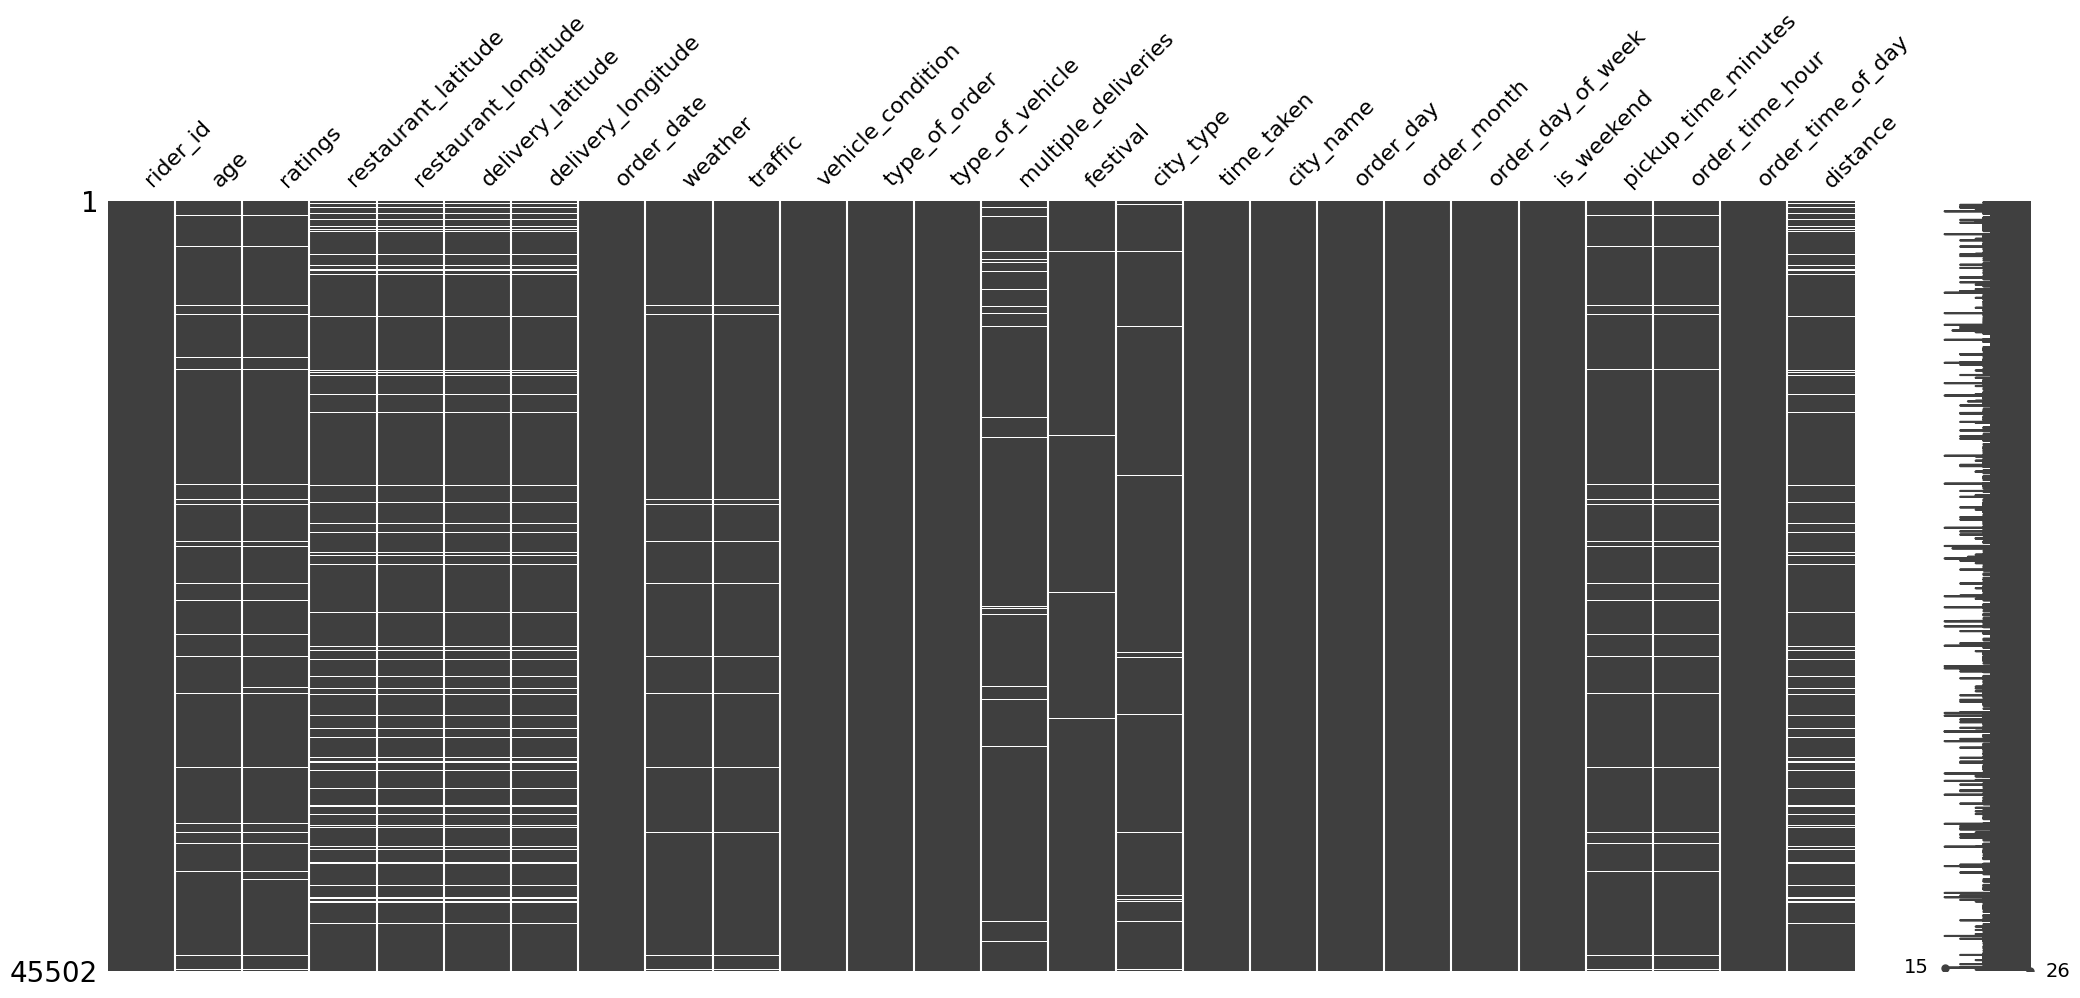

In [277]:
msno.matrix(df)
plt.show()


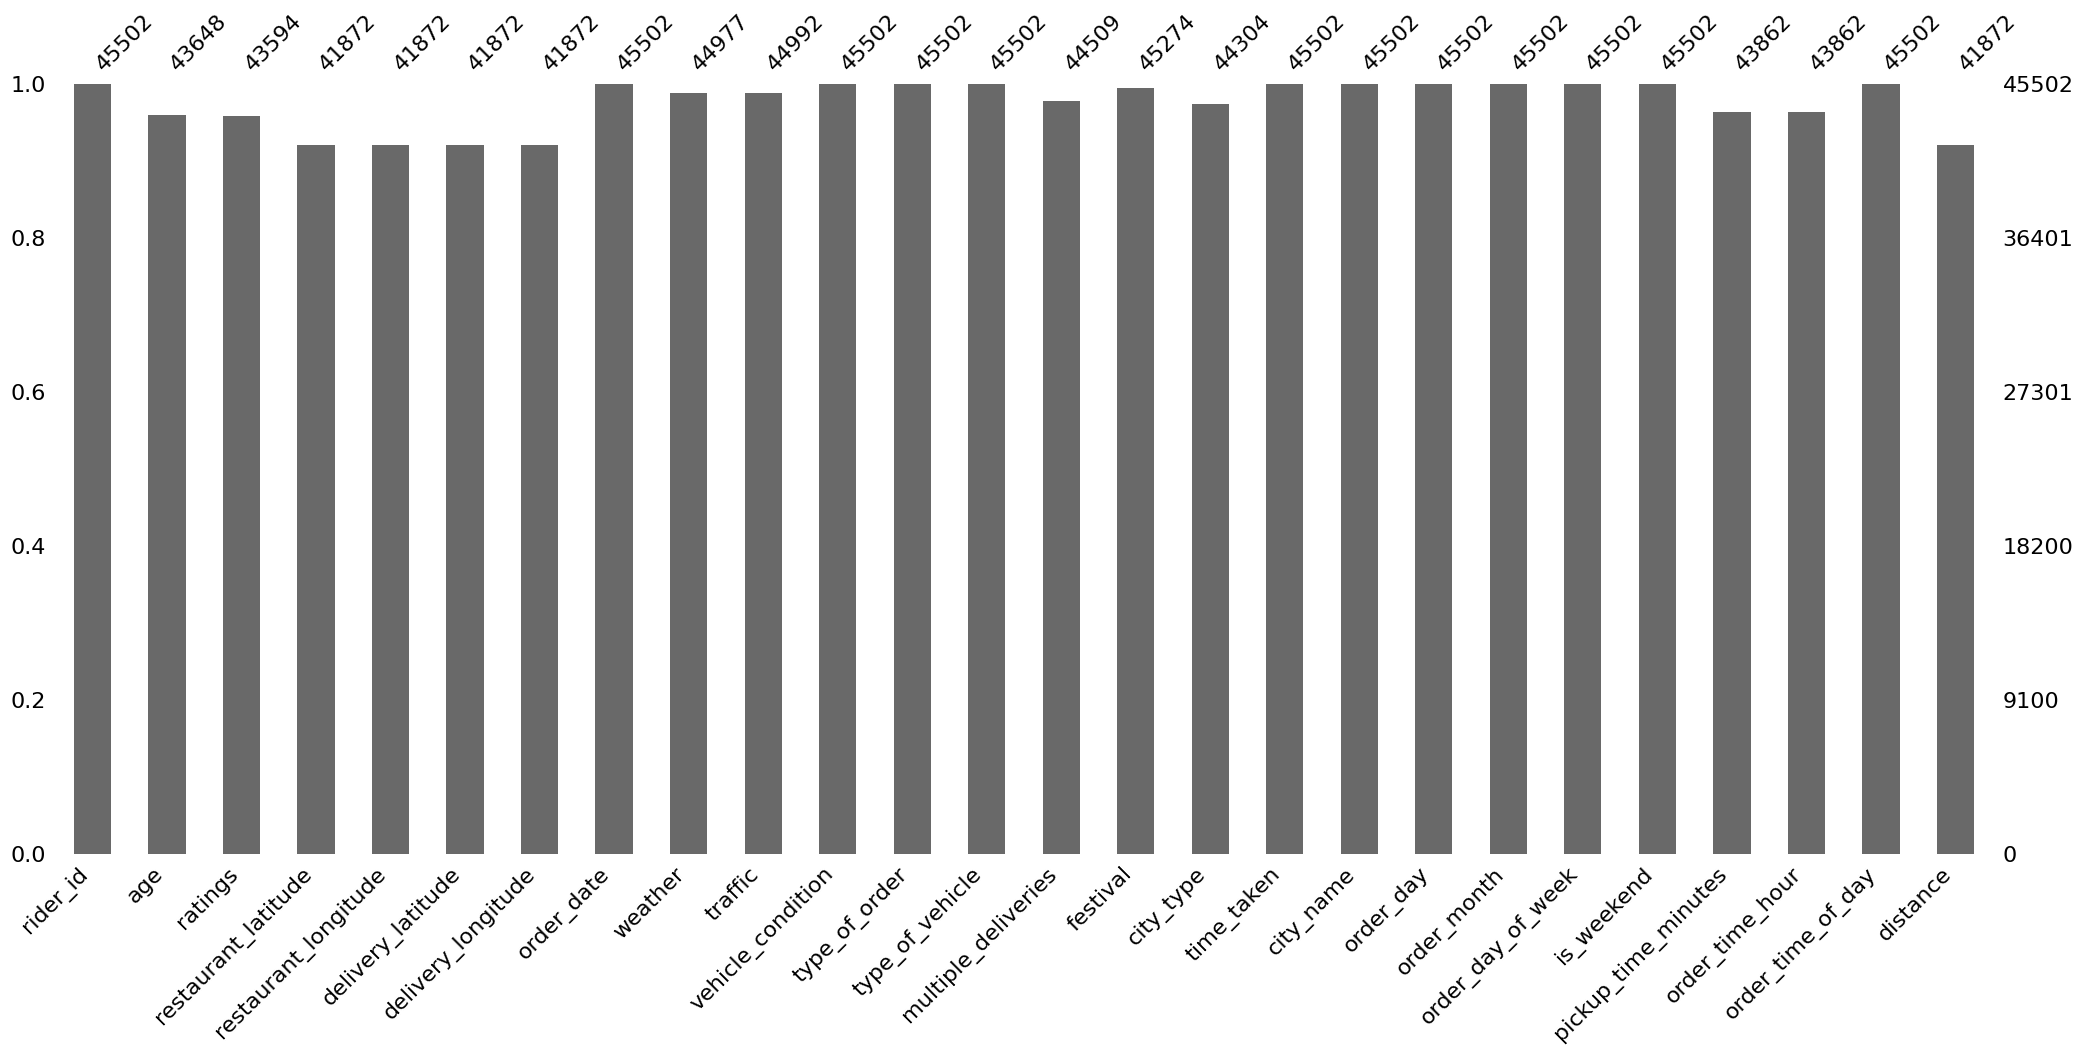

In [278]:
msno.bar(df)
plt.show()


In [279]:
df["city_name"].unique()

<StringArray>
[  'INDO',   'BANG',  'COIMB',   'CHEN',    'HYD', 'RANCHI',    'MYS',
    'DEH',    'KOC',   'PUNE',   'LUDH',    'KNP',    'MUM',    'KOL',
    'JAP',    'SUR',    'GOA',   'AURG',    'AGR',    'VAD',    'ALH',
    'BHP']
Length: 22, dtype: str

In [280]:
df["order_day_of_week"].unique()

<StringArray>
['saturday', 'friday', 'tuesday', 'monday', 'sunday', 'wednesday', 'thursday']
Length: 7, dtype: str

In [281]:
df["type_of_vehicle"].unique()

<StringArray>
['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Length: 4, dtype: str

In [282]:
df["type_of_order"].unique()

<StringArray>
['snack', 'drinks', 'buffet', 'meal']
Length: 4, dtype: str

In [283]:
df["traffic"].unique()

<StringArray>
['high', 'jam', 'low', 'medium', nan]
Length: 5, dtype: str

In [284]:
df["city_type"].unique()

<StringArray>
['urban', 'metropolitian', 'semi-urban', nan]
Length: 4, dtype: str

# Categorical data

In [285]:
df.select_dtypes(include=["object"]).columns

C:\Users\User\AppData\Local\Temp\ipykernel_18332\2790643224.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  df.select_dtypes(include=["object"]).columns


Index(['rider_id', 'order_date', 'weather', 'traffic', 'type_of_order',
       'type_of_vehicle', 'festival', 'city_type', 'city_name',
       'order_day_of_week', 'order_time_of_day'],
      dtype='str')

In [286]:
df["type_of_vehicle"].unique()

<StringArray>
['motorcycle', 'scooter', 'electric_scooter', 'bicycle']
Length: 4, dtype: str

#ordinal

In [287]:
df["order_time_of_day"].unique()

<StringArray>
['morning', 'evening', 'afternoon', 'night', 'after_midnight']
Length: 5, dtype: str

In [288]:
df["type_of_order"].unique()

<StringArray>
['snack', 'drinks', 'buffet', 'meal']
Length: 4, dtype: str

In [289]:
df.columns

Index(['rider_id', 'age', 'ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_latitude', 'delivery_longitude',
       'order_date', 'weather', 'traffic', 'vehicle_condition',
       'type_of_order', 'type_of_vehicle', 'multiple_deliveries', 'festival',
       'city_type', 'time_taken', 'city_name', 'order_day', 'order_month',
       'order_day_of_week', 'is_weekend', 'pickup_time_minutes',
       'order_time_hour', 'order_time_of_day', 'distance'],
      dtype='str')

In [290]:
df["city_name"].unique()

<StringArray>
[  'INDO',   'BANG',  'COIMB',   'CHEN',    'HYD', 'RANCHI',    'MYS',
    'DEH',    'KOC',   'PUNE',   'LUDH',    'KNP',    'MUM',    'KOL',
    'JAP',    'SUR',    'GOA',   'AURG',    'AGR',    'VAD',    'ALH',
    'BHP']
Length: 22, dtype: str

# Discrite Values

In [291]:
df.select_dtypes(include=["int"]).columns

Index(['vehicle_condition', 'time_taken', 'order_day', 'order_month',
       'is_weekend'],
      dtype='str')

# Continous

In [292]:
df.select_dtypes(include=["float"]).columns

Index(['age', 'ratings', 'restaurant_latitude', 'restaurant_longitude',
       'delivery_latitude', 'delivery_longitude', 'multiple_deliveries',
       'pickup_time_minutes', 'order_time_hour', 'distance'],
      dtype='str')

# Observation 1

In [293]:
# There no duplicate values in the Dataframe
# No inconsistance in Data
# ------Missing Vales-------------

# age                     4.074546
# ratings                 4.193222
# restaurant_latitude     7.977671
# restaurant_longitude    7.977671
# delivery_latitude       7.977671
# delivery_longitude      7.977671
# weather                 1.153795
# traffic                 1.120830
# multiple_deliveries     2.182322
# festival                0.501077
# city_type               2.632851
# pickup_time_minutes     3.604237
# order_time_hour         3.604237
# distance                7.977671

# Data_Cleaning

# Numerical Features

# AGE

<Axes: ylabel='Frequency'>

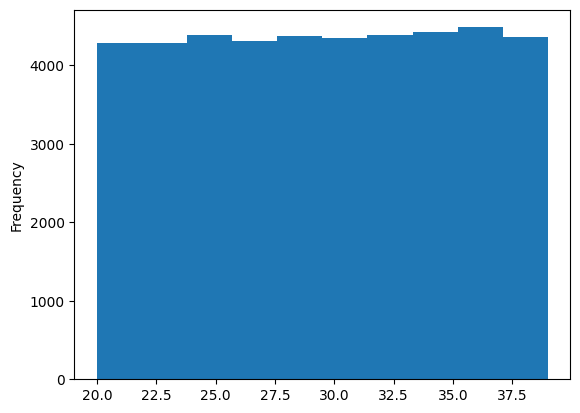

In [294]:
df["age"].plot(kind='hist')

In [295]:
df["age"].skew()

np.float64(-0.014541859592086096)

In [296]:
df["age"].describe()

count    43648.000000
mean        29.555008
std          5.761482
min         20.000000
25%         25.000000
50%         30.000000
75%         35.000000
max         39.000000
Name: age, dtype: float64

In [297]:
df["age"] = df["age"].fillna(df["age"].mean())

In [298]:
df["age"].describe()

count    45502.000000
mean        29.555008
std          5.642882
min         20.000000
25%         25.000000
50%         29.555008
75%         34.000000
max         39.000000
Name: age, dtype: float64

<Axes: ylabel='Frequency'>

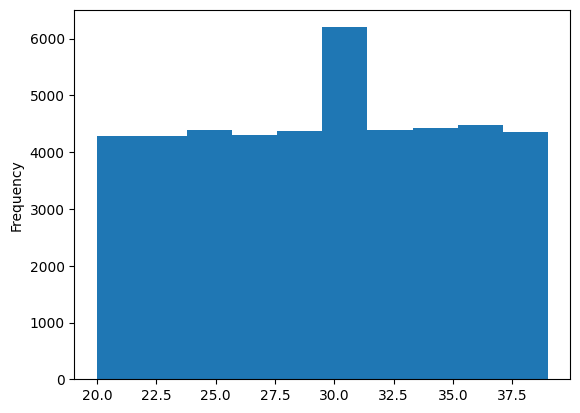

In [299]:
df["age"].plot(kind='hist')

In [300]:
df["age"].skew()

np.float64(-0.014847468330579872)

In [ ]:
def impute_numeric_by_skew(
    df,
    target_col="time_taken",
    skew_threshold=0.3
):
  

    df = df.copy()

    num_cols = df.select_dtypes(include=["int64", "float64"]).columns
    num_cols = [col for col in num_cols if col != target_col]

    for col in num_cols:
        if df[col].isna().sum() == 0:
            continue

        skew = df[col].skew()

        # If column is integer-like → median
        if pd.api.types.is_integer_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())

        # Float columns → skew-based decision
        else:
            if abs(skew) < skew_threshold:
                df[col] = df[col].fillna(df[col].mean())
            else:
                df[col] = df[col].fillna(df[col].median())

    return df

df=impute_numeric_by_skew(
    df,
    target_col="time_taken",
    skew_threshold=0.3
)



In [302]:
df.isnull().sum()/len(df)*100

rider_id                0.000000
age                     0.000000
ratings                 0.000000
restaurant_latitude     0.000000
restaurant_longitude    0.000000
delivery_latitude       0.000000
delivery_longitude      0.000000
order_date              0.000000
weather                 1.153795
traffic                 1.120830
vehicle_condition       0.000000
type_of_order           0.000000
type_of_vehicle         0.000000
multiple_deliveries     0.000000
festival                0.501077
city_type               2.632851
time_taken              0.000000
city_name               0.000000
order_day               0.000000
order_month             0.000000
order_day_of_week       0.000000
is_weekend              0.000000
pickup_time_minutes     0.000000
order_time_hour         0.000000
order_time_of_day       0.000000
distance                0.000000
dtype: float64

# Categorical

In [303]:
df[["city_name","city_type"]].head(20)

,city_name,city_type
0,INDO,urban
1,BANG,metropolitian
2,BANG,urban
3,COIMB,metropolitian
4,CHEN,metropolitian
5,HYD,urban
6,RANCHI,metropolitian
7,MYS,metropolitian
8,HYD,metropolitian
9,DEH,metropolitian


In [304]:
city_type_map = {
    "INDO": "urban",
    "BANG": "metropolitian",
    "COIMB": "metropolitian",
    "CHEN": "metropolitian",
    "HYD": "metropolitian",
    "RANCHI": "metropolitian",
    "MYS": "metropolitian",
    "DEH": "metropolitian",
    "KOC": "metropolitian",
    "PUNE": "metropolitian",
    "LUDH": "metropolitian"
}
df["city_type"] = df["city_type"].fillna(
    df["city_name"].map(city_type_map)
)
df["city_type"] = df["city_type"].fillna(df["city_type"].mode()[0])
df["weather"] = df["weather"].fillna(df["weather"].mode()[0])
df["traffic"] = df["traffic"].fillna(df["traffic"].mode()[0])
df["festival"]=df["festival"].fillna(df["festival"].mode()[0])


In [305]:
df.isnull().sum()/len(df)*100

rider_id                0.0
age                     0.0
ratings                 0.0
restaurant_latitude     0.0
restaurant_longitude    0.0
delivery_latitude       0.0
delivery_longitude      0.0
order_date              0.0
weather                 0.0
traffic                 0.0
vehicle_condition       0.0
type_of_order           0.0
type_of_vehicle         0.0
multiple_deliveries     0.0
festival                0.0
city_type               0.0
time_taken              0.0
city_name               0.0
order_day               0.0
order_month             0.0
order_day_of_week       0.0
is_weekend              0.0
pickup_time_minutes     0.0
order_time_hour         0.0
order_time_of_day       0.0
distance                0.0
dtype: float64

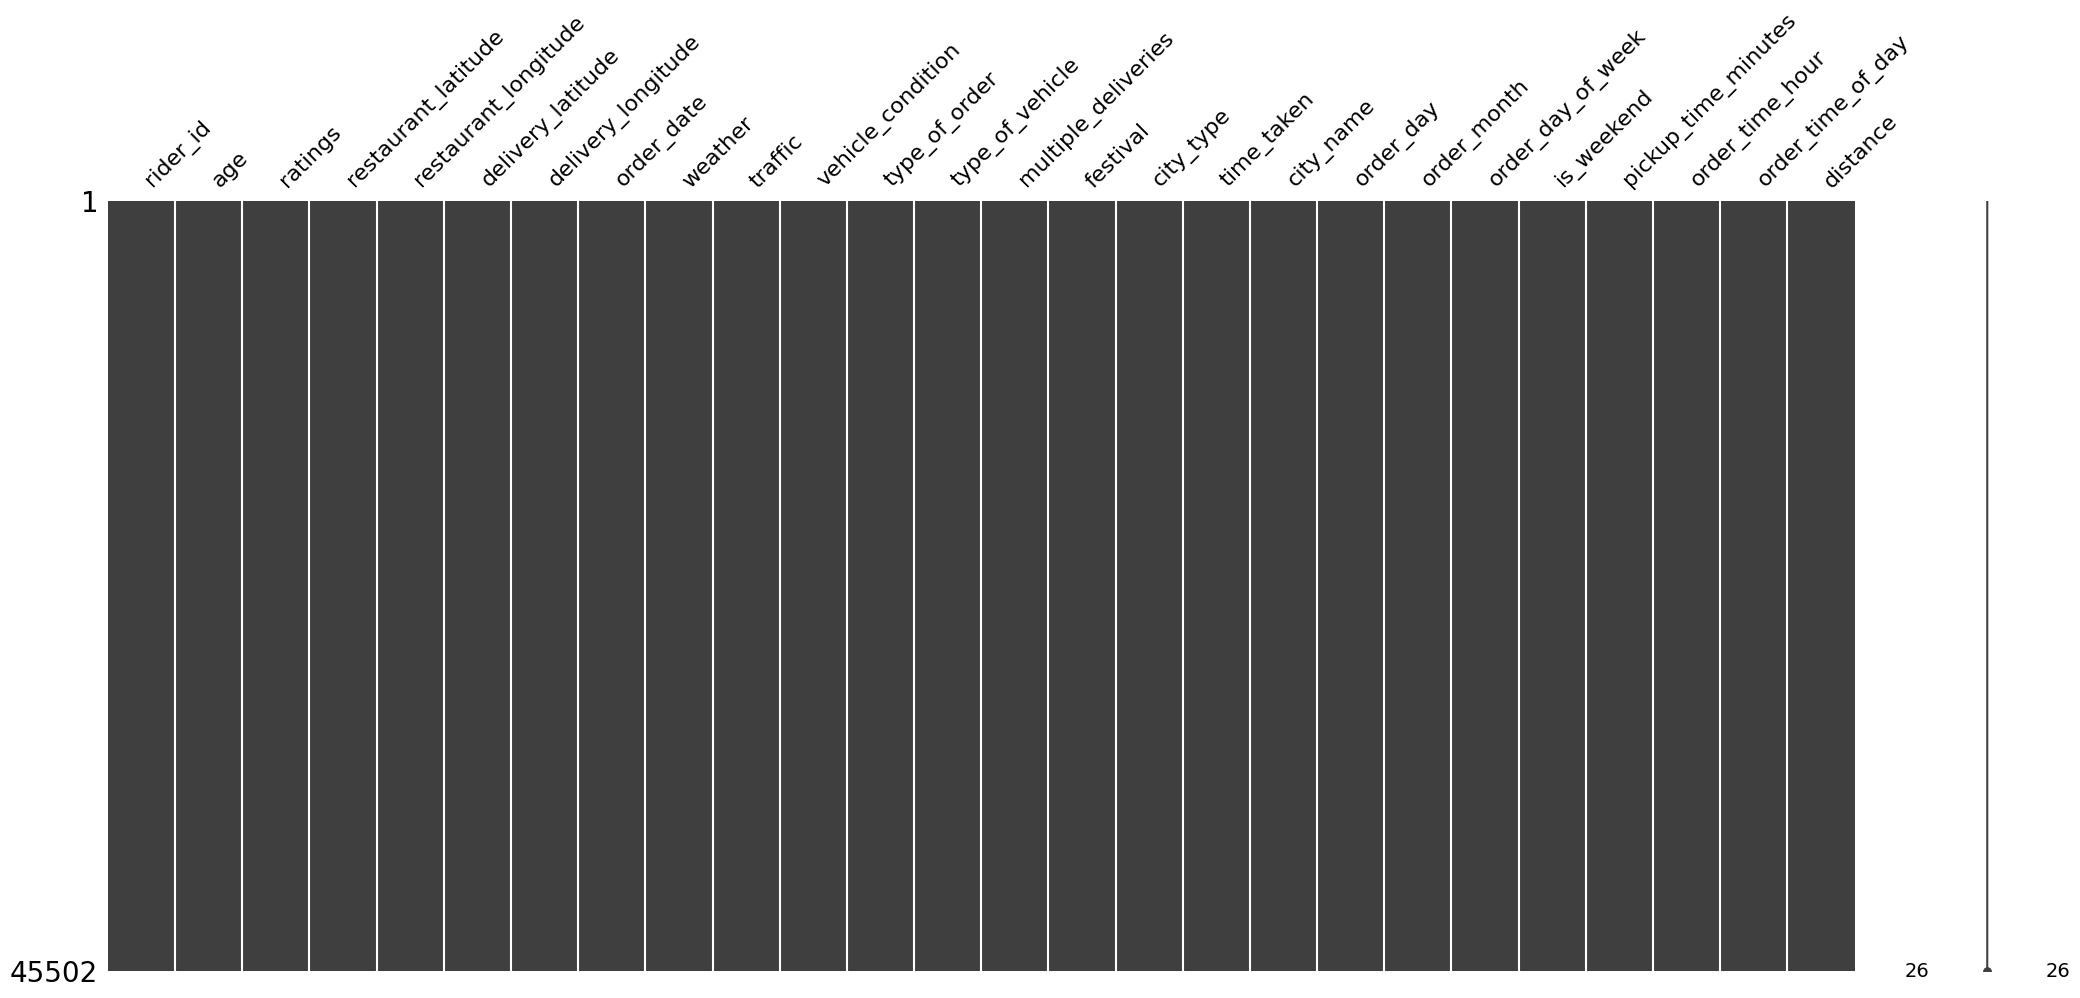

In [306]:
msno.matrix(df)
plt.show()

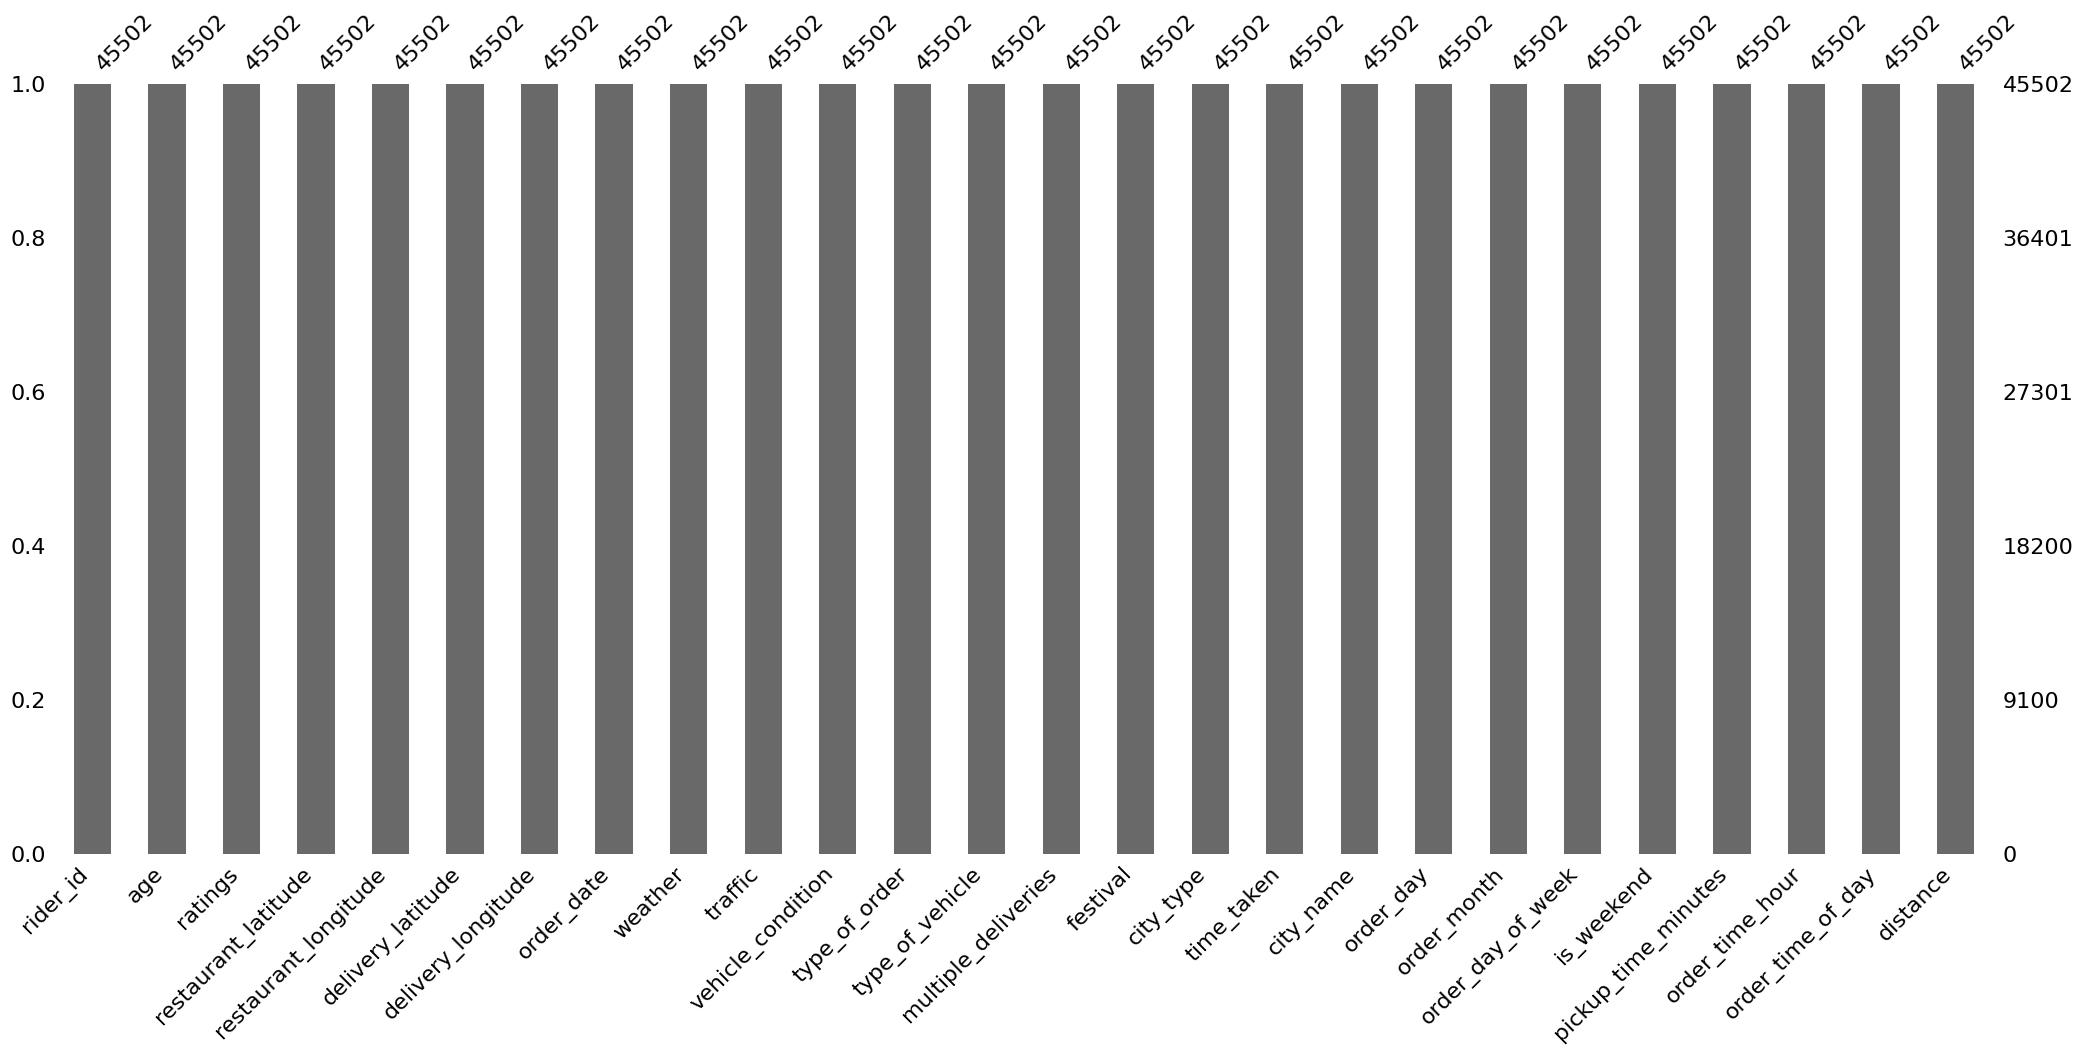

In [307]:
msno.bar(df)
plt.show()

In [308]:
df.to_csv(r"D:\Swiggy_Time_prediction\Data\swiggy_demo.csv")